<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/Projeto_Quant_Estados_e_Munc%C3%ADpios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto**

Desenvolvido na matéria de Programação e Machine Learning lecionada pela Professora Patricia Alves Pereira no Ibmec São Paulo.

#**Análises de operações de crédito de estados e municípios**

"A contratação de operações de crédito por Estados, Distrito Federal e Municípios, incluindo suas autarquias, fundações e empresas estatais dependentes , subordina-se às normas da Lei de Responsabilidade Fiscal (LRF) e das Resoluções do Senado Federal 40/2001 e 43/2001. Os entes subnacionais ou suas empresas estatais não dependentes submetem à Secretaria do Tesouro Nacional (STN) ou à instituição financeira credora um pedido de verificação de limites e condições (PVL) para contratação dessas operações. Para mais informações, acesse o Manual para Instrução de Pleitos (MIP), disponível em https://tesourotransparente.gov.br/mip."

1)Texto apresentando seu projeto: título, quais dados estão na base original, o que você vai analisar (seu objetivo de estudo)

# Qual o objetivo do estudo?


Quem faz operações de crédito para os municípios e Estados? Qual categoria daquele que faz operações de crédito para os municípios e Estados?

Quanto está realizado em operações de crédito? Quem está recebendo os recursos e quando? 

Serão selecionados dois Estados para se responder essas perguntas, primeiro o Estado do PA e segundo o Estado de DF, tendo como justificativa o primeiro ser o estado onde radica-se a família daquele que realiza a prova e o segundo o Estado que abarca a capital federal, para assim realizar a abertura, análise e conclusão.



2)Apresentar detalhadamente todos os dados: tipo de dados; quantidade e quais de colunas; número de linhas.

Dicionário de dados- Tesouro Transparente

Aqui está definido pelo Tesouro Nacional o que cada dado significa. Mais abaixo, após o carregamento dos dados, será apresentado os tipos dos dados.

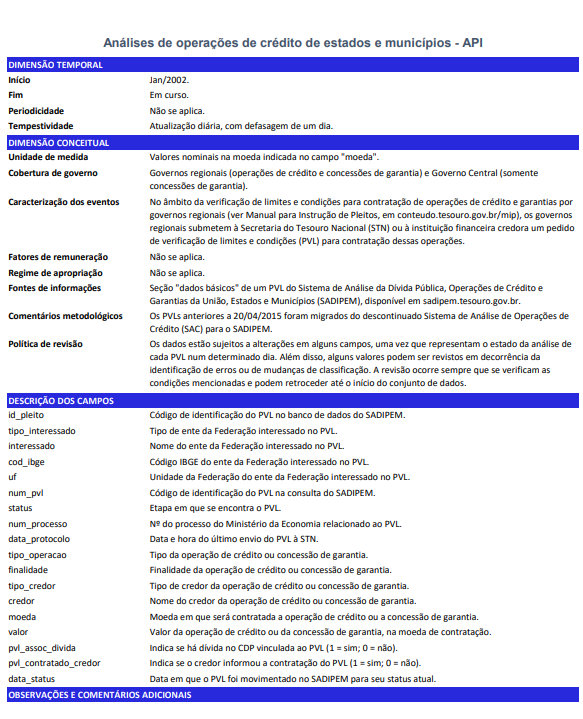

# **Carregamento dos dados**

In [ ]:
from google.colab import drive


drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Conexão com banco de dados .csv
#Fonte https://www.tesourotransparente.gov.br/ckan/dataset/operacoes-copem
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dados_cd = pd.read_csv('/content/drive/My Drive/AP2-Patricia/SADIPEMCONSULTAPUBLICAGERALBATCH16102021trat (1).csv', encoding= 'ISO-8859-1', sep= ';', decimal ='.')
dados_cd

,Interessado,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Código IBGE,Status,Data,Analisado por
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,00000.000000/0021-94,3100104.0,Devolvido,19/08/2009,STN
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,172700.0,17944.000104/2008-22,3100104.0,Arquivado,17/04/2008,STN
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,17944.000953/2009-67,3100104.0,Deferido,20/11/2009,STN
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,187200.0,17944.001037/2009-44,3100104.0,Deferido,20/11/2009,STN
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,1000000.0,17944.001324/2013-31,3100104.0,Deferido,06/11/2013,STN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22099,Zacarias,SP,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,200000.0,17944.000243/2008-56,3557154.0,Arquivado,30/04/2008,STN
22100,Zortéa,SC,Município,Operação Contratual Interna,PAC 2 - Pró-Transporte - Pavimentação e Qualif...,Instituição Financeira Nacional,Caixa Econômica Federal,Real,1000000.0,17944.000037/2015-75,4219853.0,Arquivado por decurso de prazo,07/10/2016,STN
22101,Zortéa,SC,Município,Operação Contratual Interna,PMAT,Instituição Financeira Nacional,Banco do Brasil S/A,Real,47394.0,19406.000010/2004-42,4219853.0,Deferido,26/02/2004,STN
22102,Zortéa,SC,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Agência de Fomento do Estado de Santa Catarina...,Real,250000.0,19406.000070/2002-01,4219853.0,Deferido,27/06/2002,STN


# **Tratamento dos dados**

5)Insira no mínimo uma nova coluna em seu dataframe resultante de algum cálculo ou  manipulação  dos  dados  aplicados  em  uma  das  colunas  da  base  de  dados original;

6)Altere algum dos dados da base de dados (trocar o conteúdo)

Criação de colunas para trabalhar com datas, criação de coluna Valor em milhôes de R$, e criação de uma coluna com o código da UF

In [ ]:
#Datas

for i in range(len(dados_cd)):
  dados_cd.loc[i,'Data_datetime'] =  datetime.datetime.strptime(dados_cd.loc[i, 'Data'], "%d/%m/%Y")


for i in range(len(dados_cd)):
    dados_cd.loc[i,'Mes'] =  dados_cd.loc[i,'Data_datetime'].month
    dados_cd.loc[i,'Ano'] =  dados_cd.loc[i,'Data_datetime'].year


#Valores em milhões
for i in range(len(dados_cd)):
  dados_cd.loc[i,'Valormm'] =  dados_cd.loc[i, 'Valor']/1000000

# Altere algum dos dados da base de dados (trocar o conteúdo) 

dados_cd["Credor"]= dados_cd["Credor"].replace('Caixa Econômica Federal', "CEF")
dados_cd["Credor"]= dados_cd["Credor"].replace('Banco Nacional de Desenvolvimento Econômico e Social', "BNDES")


In [ ]:

#Transformando o dado do código IBGE em código IBGE do Estado

for i in range(len(dados_cd)):
  dados_cd.loc[i,'CD_UF'] =  str(dados_cd.loc[i,'Código IBGE'])[:2]

#Substituindo os valores nan e depois dropando as linhas.
dados_cd.replace("na", float('NaN'), inplace=True)
dados_cd.dropna(subset=['CD_UF'], inplace=True)






In [ ]:
len(dados_cd['CD_UF'].unique())

27

8)Crie subtabelas (filtros) que atendam algum critério definido por você.

Criando subtabela

Critério- dados que serão manuseados

In [ ]:
subdados = dados_cd[['Interessado','UF', 'CD_UF','Tipo de interessado', 'Tipo de operação', 'Finalidade', 'Tipo de credor', 'Credor', 'Moeda', 'Valor', 'Valormm','Código IBGE', 'Data_datetime', 'Mes', 'Ano']]
subdados

,Interessado,UF,CD_UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Valormm,Código IBGE,Data_datetime,Mes,Ano
0,Abadia dos Dourados,MG,31,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,CEF,Real,300000.0,0.300000,3100104.0,2009-08-19,8.0,2009.0
1,Abadia dos Dourados,MG,31,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,CEF,Real,172700.0,0.172700,3100104.0,2008-04-17,4.0,2008.0
2,Abadia dos Dourados,MG,31,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,CEF,Real,300000.0,0.300000,3100104.0,2009-11-20,11.0,2009.0
3,Abadia dos Dourados,MG,31,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,CEF,Real,187200.0,0.187200,3100104.0,2009-11-20,11.0,2009.0
4,Abadia dos Dourados,MG,31,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,1000000.0,1.000000,3100104.0,2013-11-06,11.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22099,Zacarias,SP,35,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,CEF,Real,200000.0,0.200000,3557154.0,2008-04-30,4.0,2008.0
22100,Zortéa,SC,42,Município,Operação Contratual Interna,PAC 2 - Pró-Transporte - Pavimentação e Qualif...,Instituição Financeira Nacional,CEF,Real,1000000.0,1.000000,4219853.0,2016-10-07,10.0,2016.0
22101,Zortéa,SC,42,Município,Operação Contratual Interna,PMAT,Instituição Financeira Nacional,Banco do Brasil S/A,Real,47394.0,0.047394,4219853.0,2004-02-26,2.0,2004.0
22102,Zortéa,SC,42,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Agência de Fomento do Estado de Santa Catarina...,Real,250000.0,0.250000,4219853.0,2002-06-27,6.0,2002.0


In [ ]:
subdados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22089 entries, 0 to 22103
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Interessado          22089 non-null  object        
 1   UF                   22089 non-null  object        
 2   CD_UF                22089 non-null  object        
 3   Tipo de interessado  22089 non-null  object        
 4   Tipo de operação     22089 non-null  object        
 5   Finalidade           22089 non-null  object        
 6   Tipo de credor       22089 non-null  object        
 7   Credor               22089 non-null  object        
 8   Moeda                22089 non-null  object        
 9   Valor                22089 non-null  float64       
 10  Valormm              22089 non-null  float64       
 11  Código IBGE          22089 non-null  float64       
 12  Data_datetime        22089 non-null  datetime64[ns]
 13  Mes                  22089 non-

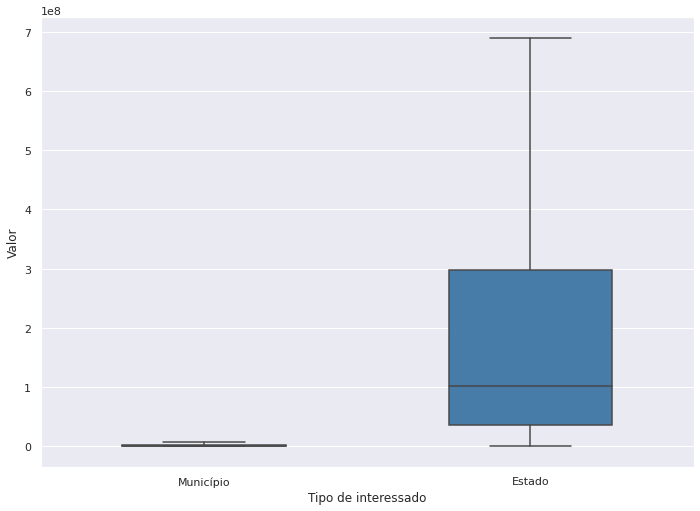

In [ ]:
#Box plot Tipo de interessado
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.boxplot(x="Tipo de interessado", y="Valor",  data=subdados, palette="Set1", width=0.5, showfliers = False)
plt.show()

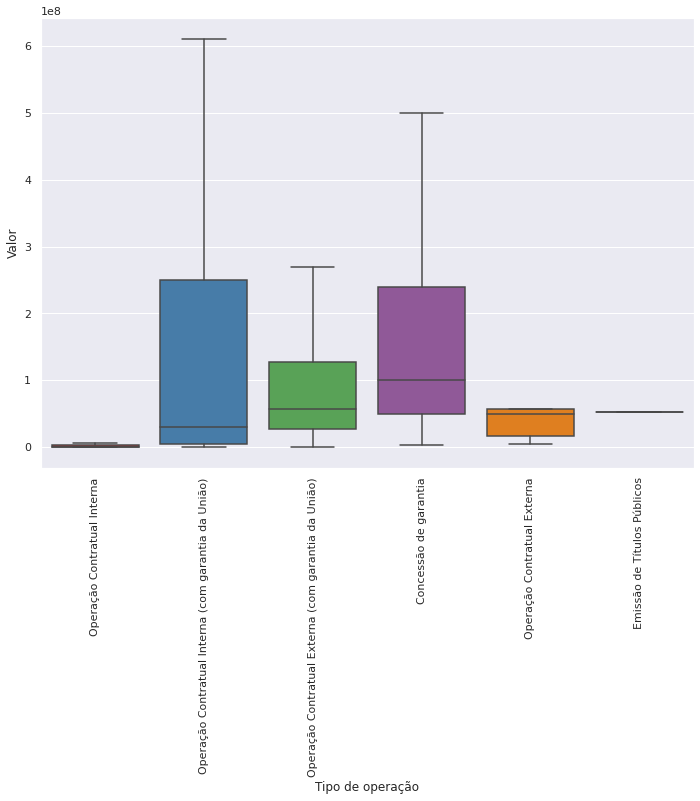

In [ ]:
#Box plot Tipo de operação

ax = sns.boxplot(x="Tipo de operação", y="Valor",  data=subdados, palette="Set1", showfliers = False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

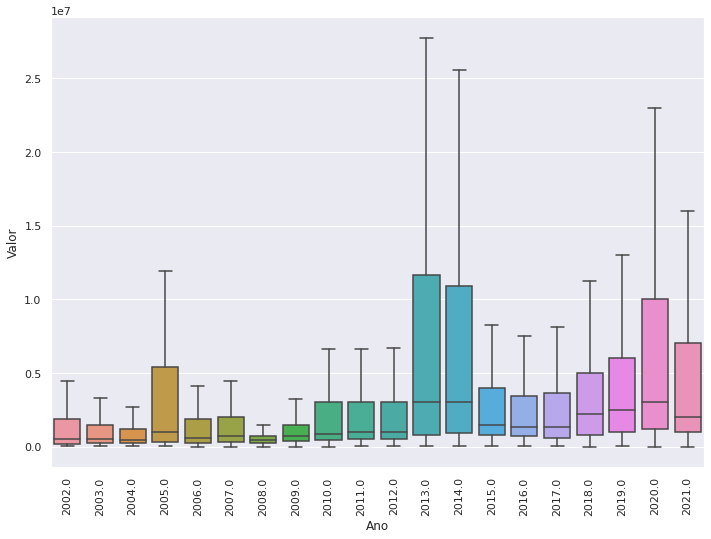

In [ ]:
#Box plot


ax = sns.boxplot( x=subdados2["Ano"], y=subdados2["Valor"], showfliers = False )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

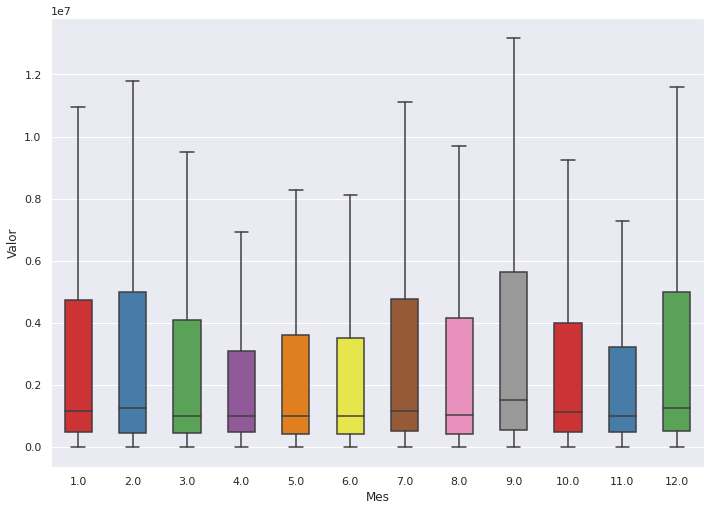

In [ ]:
#Box plot

sns.boxplot(x="Mes", y="Valor",  data=subdados2, palette="Set1", width=0.5, showfliers = False)
plt.show()

# **Análise Estatística Completa, Gráficos e interpretação**

4)Eleja uma coluna da base de dados que possa ser analisada sob no mínimo duas características  e  agrupe-a:  realize  contagem,  frequência  e  gráficos  que  melhor represente essas informações, tais como: coluna; barra; pizza ou linha. Apresente gráficos completos com títulos e legenda

In [ ]:
est1 = subdados.groupby('UF').describe()['Valormm']
est1

,count,mean,std,min,25%,50%,75%,max
UF,,,,,,,,
AC,76.0,74.409724,113.504805,3.003810e-01,6.700000,30.874154,96.250000,641.160000
AL,89.0,113.328354,687.341243,1.727000e-01,0.495576,1.908000,9.387150,6461.356968
AM,79.0,130.355901,152.230050,4.100000e-01,21.944342,72.900000,193.863000,764.000000
AP,28.0,138.324773,317.787231,7.500000e-01,5.793833,14.500000,82.647540,1400.000000
BA,973.0,18.541198,90.400279,5.567200e-03,0.400000,1.000000,5.000000,1487.691273
CE,355.0,59.056527,152.996374,1.000000e-08,0.808860,3.769400,49.689225,1150.000000
DF,48.0,171.905876,239.973641,1.257500e+01,44.103000,94.500000,179.993358,1439.500000
ES,275.0,47.833223,216.904050,1.821800e-01,1.209018,5.000000,20.187500,3000.000000
GO,466.0,64.658890,342.563709,1.239398e-02,0.500000,2.983422,17.773708,3728.000000


          Valormm
UF               
AC    5655.139050
AL   10086.223473
AM   10298.116217
AP    3873.093641
BA   18040.585988
CE   20965.067082
DF    8251.482037
ES   13154.136318
GO   30131.042862
MA    7947.682150
MG  134342.485614
MS   13433.904665
MT   11776.146719
PA   38868.382752
PB    5219.618528
PE   19814.869283
PI    8468.760205
PR   30833.103773
RJ   50134.899773
RN    5156.756564
RO    4587.190069
RR    2021.405673
RS   88278.878155
SC   45233.375517
SE    6186.646939
SP  345530.372269
TO    6367.793945


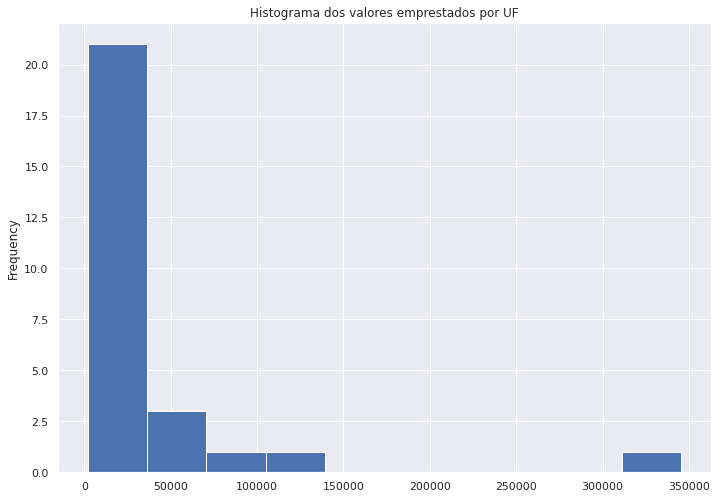

In [ ]:
#7)Consolide os dados no formato de tabelas (pivot table);
#Tabela dinâmica2

tabela_pivotgf = subdados.pivot_table(values='Valormm', index=['UF'], aggfunc=sum)
print(tabela_pivotgf)

tabela_pivotgf.Valormm.plot(kind='hist',title="Histograma dos valores emprestados por UF")

plt.show()

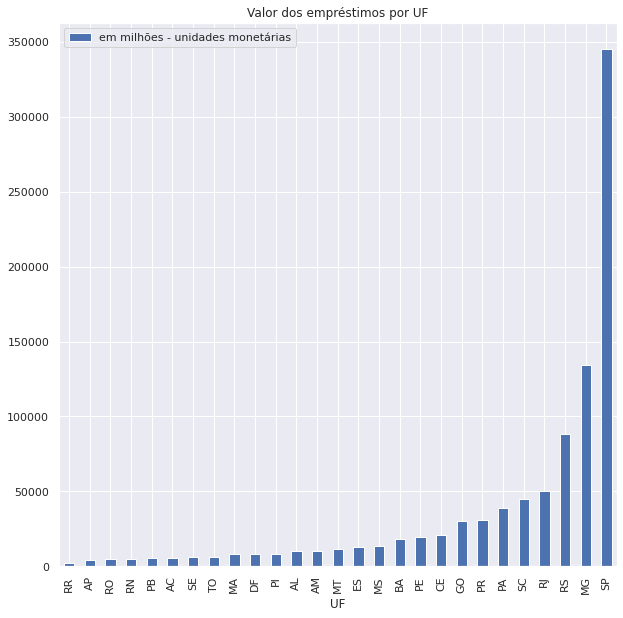

In [ ]:
df = tabela_pivotgf.sort_values('Valormm')
df = df.rename(columns={'Valormm': 'em milhões - unidades monetárias'})
df.plot.bar(figsize = (10,10))
plt.title('Valor dos empréstimos por UF')
plt.legend(loc="upper left");

# **1º Estado - Pará- PA**

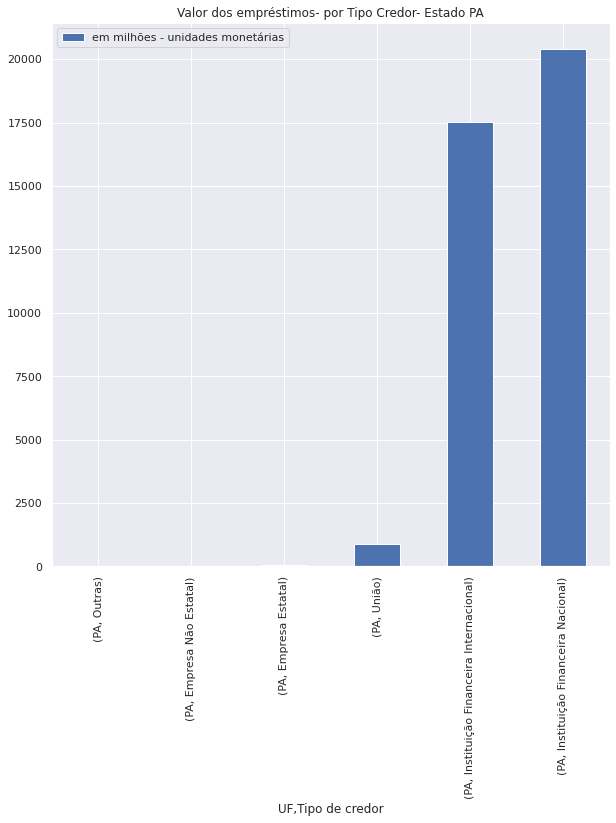

In [ ]:
tabela_pivotsete = subdados.pivot_table(values='Valormm', index=['UF', 'Tipo de credor'], aggfunc=sum)
tabquery2= tabela_pivotsete.query('UF == "PA"')

df2 = tabquery2.sort_values('Valormm')
df2 = df2.rename(columns={'Valormm': 'em milhões - unidades monetárias'})
df2.plot.bar(figsize = (10,10))
plt.title('Valor dos empréstimos- por Tipo Credor- Estado PA')
plt.legend(loc="upper left");

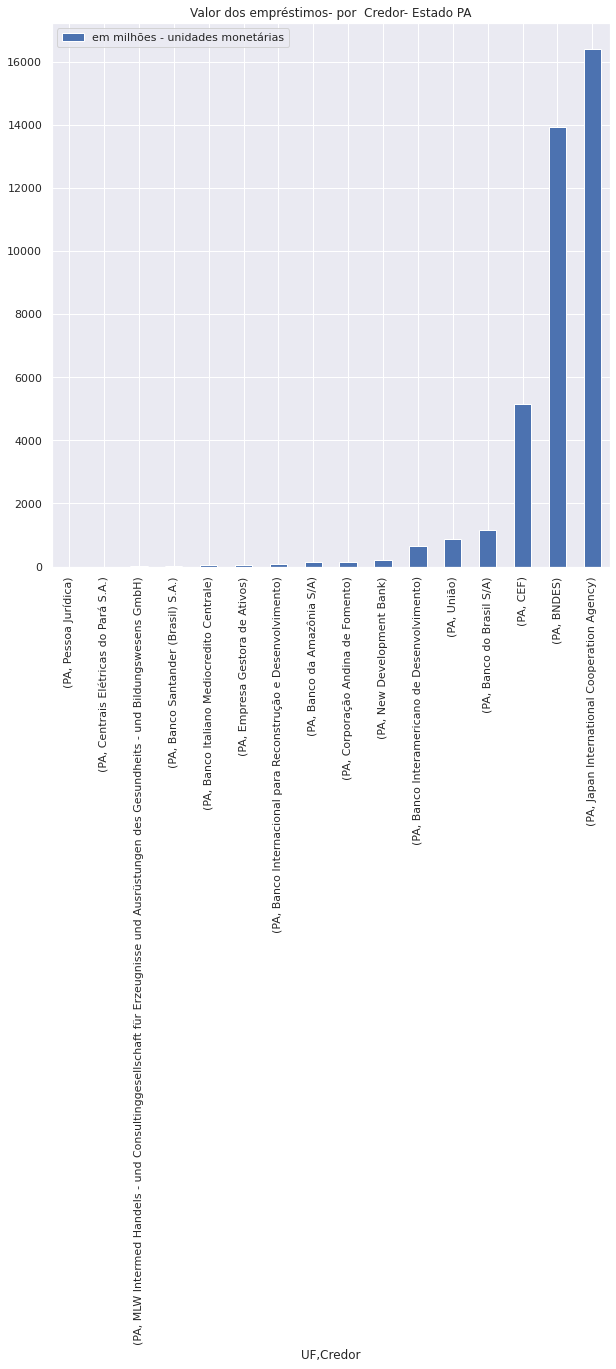

In [ ]:
tabela_pivotoito = subdados.pivot_table(values='Valormm', index=['UF', 'Credor'], aggfunc=sum)
tabquery3= tabela_pivotoito.query('UF == "PA"')


df3 = tabquery3.sort_values('Valormm')
df3 = df3.rename(columns={'Valormm': 'em milhões - unidades monetárias'})
df3.plot.bar(figsize = (10,10))
plt.title('Valor dos empréstimos- por  Credor- Estado PA')
plt.legend(loc="upper left");

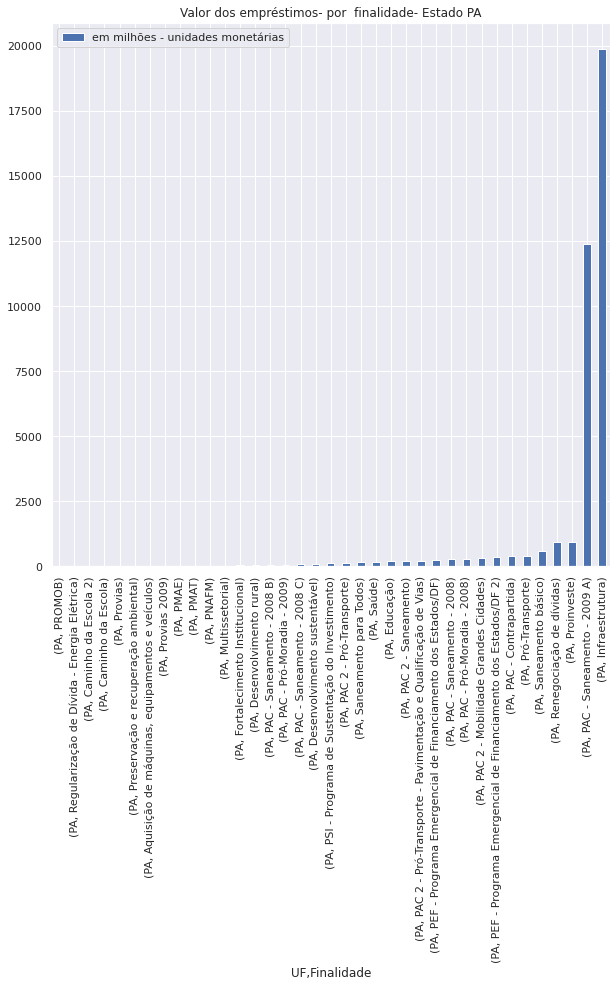

In [ ]:
tabela_pivotnove = subdados.pivot_table(values='Valormm', index=['UF','Finalidade'], aggfunc=sum)
tabquery4= tabela_pivotnove.query('UF == "PA"')



df4 = tabquery4.sort_values('Valormm')
df4 = df4.rename(columns={'Valormm': 'em milhões - unidades monetárias'})
df4.plot.bar(figsize = (10,10))
plt.title('Valor dos empréstimos- por  finalidade- Estado PA')
plt.legend(loc="upper left");

In [ ]:
tabela_pivotnove = subdados.pivot_table(values='Valormm', index=['UF','Finalidade', 'Credor'], aggfunc=sum)
tabquery4= tabela_pivotnove.query('UF == "PA"')
tabquery4

Valormm
UF Finalidade                                         Credor                                                          
PA Aquisição de máquinas, equipamentos e veículos     Banco do Brasil S/A                                     1.500000
                                                      MLW Intermed Handels - und Consultinggesellscha...     17.000000
   Caminho da Escola                                  Banco da Amazônia S/A                                   1.079400
                                                      Banco do Brasil S/A                                     2.838450
   Caminho da Escola 2                                Banco do Brasil S/A                                     3.710700
   Desenvolvimento rural                              Banco Internacional para Reconstrução e Desenvo...     60.000000
   Desenvolvimento sustentável                        Corporação Andina de Fomento                           50.000000
                                                      New Development Bank                                   50.000000
   Educação                                           Banco Interamericano de Desenvolvimento               200.810000
   Fortalecimento Institucional                       Banco Interamericano de Desenvolvimento                35.100000
                                                      Banco Internacional para Reconstrução e Desenvo...     10.000000
   Infraestrutura                                     BNDES                                                 246.700000
                                                      Banco Interamericano de Desenvolvimento               116.078400
                                                      Banco Italiano Mediocredito Centrale                   42.670000
                                                      Banco Santander (Brasil) S.A.                          30.000000
                                                      Banco do Brasil S/A                                   870.763758
                                                      CEF                                                  1935.169834
                                                      Corporação Andina de Fomento                           85.000000
                                                      Japan International Cooperation Agency              16411.000000
                                                      New Development Bank                                  152.574800
   Multissetorial                                     Banco Interamericano de Desenvolvimento                26.400000
   PAC - Contrapartida                                CEF                                                   403.724680
   PAC - Pró-Moradia - 2008                           CEF                                                   288.280970
   PAC - Pró-Moradia - 2009                           CEF                                                    70.015000
   PAC - Saneamento - 2008                            CEF                                                   268.799684
   PAC - Saneamento - 2008 B                          CEF                                                    68.463999
   PAC - Saneamento - 2008 C                          CEF                                                    91.800000
   PAC - Saneamento - 2009 A                          BNDES                                               12162.321768
                                                      CEF                                                   223.459623
   PAC 2 - Mobilidade Grandes Cidades                 CEF                                                   314.000000
   PAC 2 - Pró-Transporte                             CEF                                                   148.324225
   PAC 2 - Pró-Transporte - Pavimentação e Qualifi... CEF                                                   218.845417
   PAC 2 - Saneamento                                 CEF        

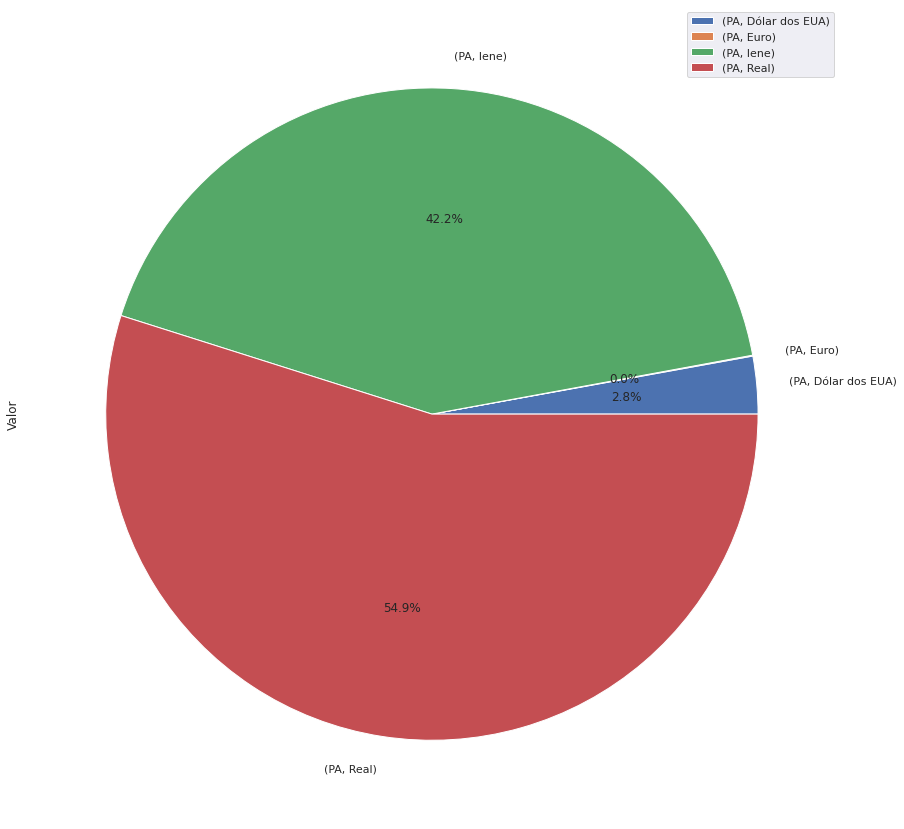

In [ ]:
tabela_pivotsete = subdados.pivot_table(values='Valor', index=['UF','Moeda'], aggfunc=sum)
tabquery2= tabela_pivotsete.query('UF == "PA"')
#tabquery2.sort_values('Valor').plot.bar(figsize= (10,10))


plot = tabquery2.plot.pie(y='Valor', figsize=(15, 15), autopct='%1.1f%%')

**Manipulando datas**

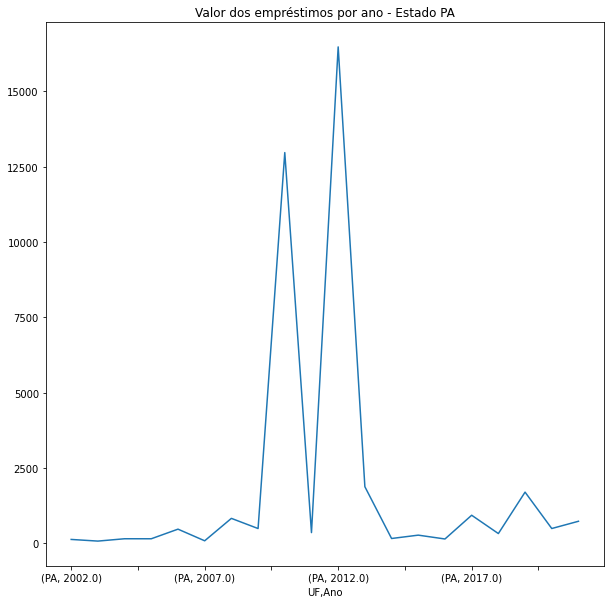

In [ ]:
#Datas


tabela_pivotonze = subdados.pivot_table(values='Valormm', index=['UF', 'Ano'], aggfunc=sum)
tabquery5= tabela_pivotonze.query('UF == "PA"')

ts = pd.Series(tabquery5.Valormm)

plt.xticks(rotation=90)
plt.title('Valor dos empréstimos por ano - Estado PA')

ts.plot(figsize = (10,10));

In [ ]:
tabela_pivotnove = subdados.pivot_table(values='Valormm', index=['UF','Finalidade', 'Ano'], aggfunc=sum)
tabquery4= tabela_pivotnove.query('UF == "PA"')
tabquery4= tabquery4.query('Ano == "2012"')
tabquery4

Valormm
UF Finalidade                                         Ano                 
PA Infraestrutura                                     2012.0  16411.000000
   PAC - Contrapartida                                2012.0     30.901747
   PAC 2 - Pró-Transporte - Pavimentação e Qualifi... 2012.0     16.682000
   PMAT                                               2012.0     12.685725

# **Conclusão para Pará (PA):**




Referências externas

https://cidades.ibge.gov.br/brasil/pa/panorama

http://investpara.com.br/dados-economicos-do-estado-do-para/

O Estado do Pará (PA) tem como destaques os seguintes fatos: (i) ser o 2ºmaior Estado em extensão territorial; (ii) ocupa a 24ª posição de 27 no que tange ao IDH; (iii) economia com forte atividade no setor de mineração e agropecuário, que atre atenção pelo valor adicionado, tendo como casos emblemáticos a recente avanço da fronteira agrícola do Mato Grosso (MT) para o PA, e a região aurífera de Carajás.

Essa contextualização auxilia a compreensão das razões que levam instituições a realizarem os empréstimos para o Estado do Pará.
Ao observar o tipo de credor, atrae atenção que as Instituições Financeiras Internacionais tem grande participação, estando no segundo posto.

Realizando a abertura desse segundo posto, encontra-se a participação da Japan International Cooperation Agency, que realizou empréstimos com a finalidade de investimento em Infraestrutura, algo carente no Estado, que pela grande extensão territorial necessita de maior valor para destinar-se para esse setor. Por esse credor ter relevância, o iene enquanto moeda tem a segunda maior participação relativa no agregado dos valores.

Os outros credores com maior valor de empréstimo são os bancos estatais: BNDES, CEF e Banco do Brasil (BB). Estes que também se destinam para projetos com maior cunho social (infraestrutura, saneamento e proinvest), que promovem a melhora no bem-estar (relação com IDH).





# **2º Estado- Distrito Federal- DF**

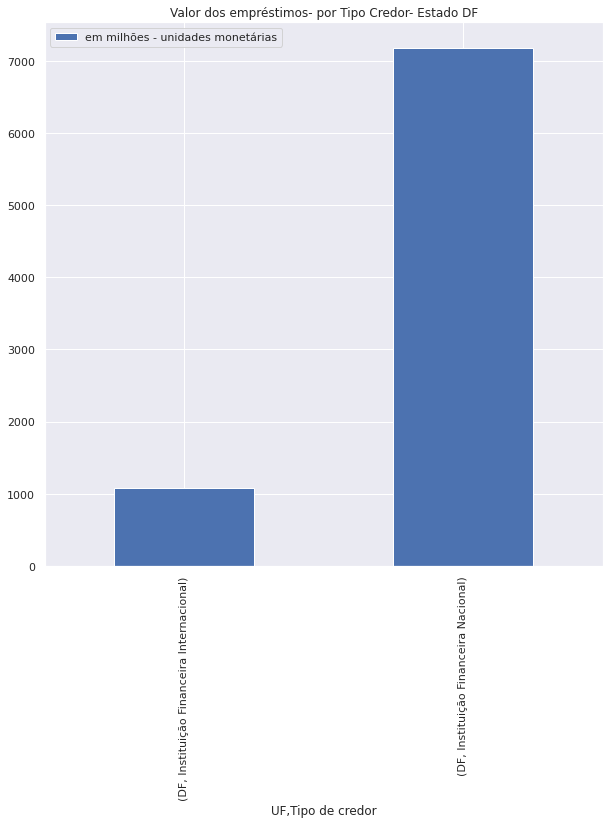

In [ ]:
tabela_pivotdoze = subdados.pivot_table(values='Valormm', index=['UF', 'Tipo de credor'], aggfunc=sum)
tabquery6= tabela_pivotdoze.query('UF == "DF"')

df5 = tabquery6.sort_values('Valormm')
df5 = df5.rename(columns={'Valormm': 'em milhões - unidades monetárias'})
df5.plot.bar(figsize = (10,10))
plt.title('Valor dos empréstimos- por Tipo Credor- Estado DF')

plt.legend(loc="upper left");

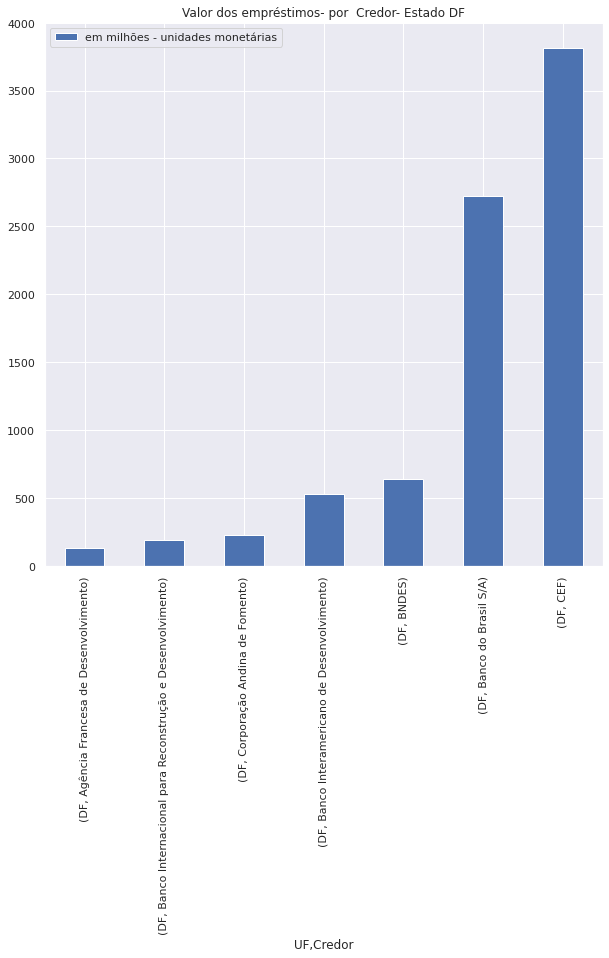

In [ ]:
tabela_pivottreze = subdados.pivot_table(values='Valormm', index=['UF', 'Credor'], aggfunc=sum)
tabquery7= tabela_pivottreze.query('UF == "DF"')


df6 = tabquery7.sort_values('Valormm')
df6 = df6.rename(columns={'Valormm': 'em milhões - unidades monetárias'})
df6.plot.bar(figsize = (10,10))
plt.title('Valor dos empréstimos- por  Credor- Estado DF')

plt.legend(loc="upper left");

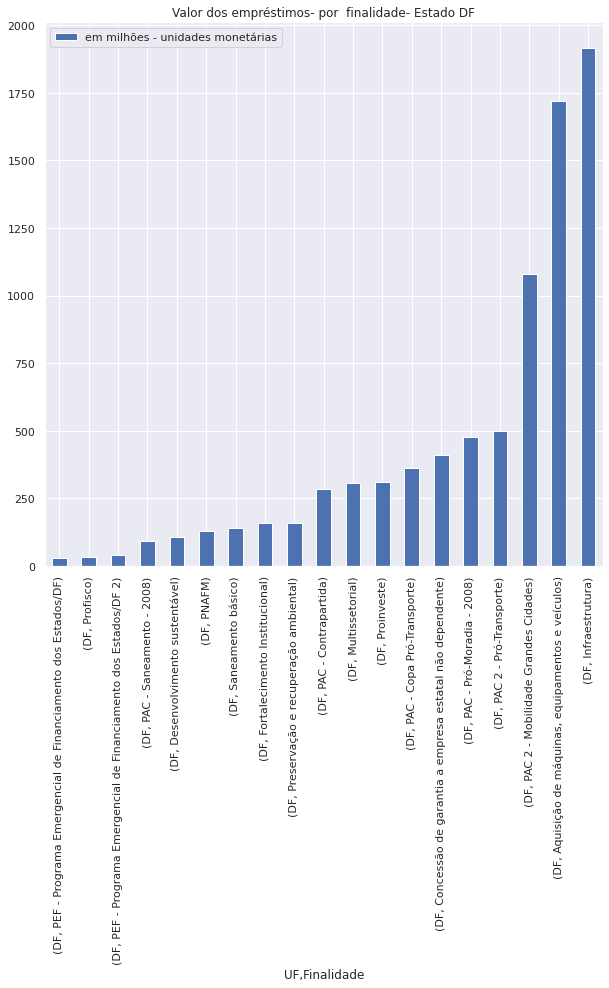

In [ ]:
tabela_pivotquat = subdados.pivot_table(values='Valormm', index=['UF','Finalidade'], aggfunc=sum)
tabquery8= tabela_pivotquat.query('UF == "DF"')



df7 = tabquery8.sort_values('Valormm')
df7 = df7.rename(columns={'Valormm': 'em milhões - unidades monetárias'})
df7.plot.bar(figsize = (10,10))
plt.title('Valor dos empréstimos- por  finalidade- Estado DF')
plt.legend(loc="upper left");

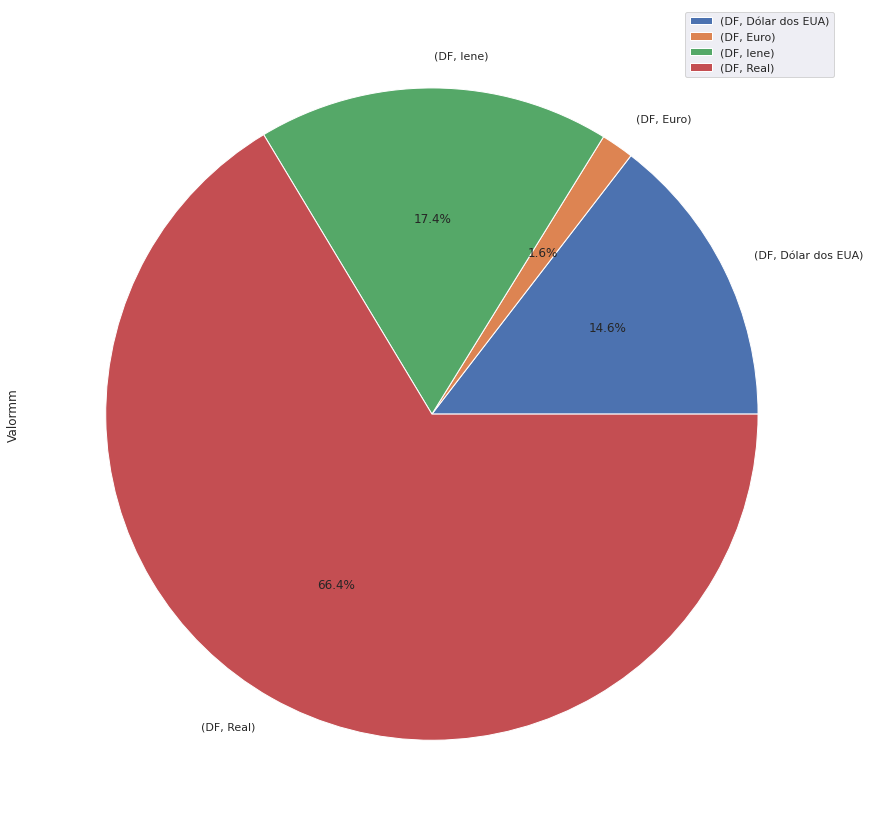

In [ ]:
tabela_pivotquin = subdados.pivot_table(values='Valormm', index=['UF','Moeda'], aggfunc=sum)
tabquery2= tabela_pivotquin.query('UF == "DF"')
#tabquery2.sort_values('Valor').plot.bar(figsize= (10,10))


plot = tabquery2.plot.pie(y='Valormm', figsize=(15, 15), autopct='%1.1f%%')

In [ ]:
tabela_pivotnove = subdados.pivot_table(values='Valormm', index=['UF','Finalidade', 'Credor'], aggfunc=sum)
tabquery4= tabela_pivotnove.query('UF == "DF"')
tabquery4

Valormm
UF Finalidade                                         Credor                                                         
DF Aquisição de máquinas, equipamentos e veículos     BNDES                                                260.318000
                                                      Banco do Brasil S/A                                 1458.197408
   Concessão de garantia a empresa estatal não dep... Banco Interamericano de Desenvolvimento              170.840000
                                                      CEF                                                  239.642000
   Desenvolvimento sustentável                        Banco Interamericano de Desenvolvimento               50.000000
                                                      Banco Internacional para Reconstrução e Desenvo...    57.643000
   Fortalecimento Institucional                       CEF                                                  160.000000
   Infraestrutura                                     Agência Francesa de Desenvolvimento                  134.000000
                                                      Banco do Brasil S/A                                 1149.975000
                                                      CEF                                                  466.743358
                                                      Corporação Andina de Fomento                         164.600000
   Multissetorial                                     Banco Interamericano de Desenvolvimento              177.203030
                                                      Banco Internacional para Reconstrução e Desenvo...   130.000000
   PAC - Contrapartida                                Banco do Brasil S/A                                  114.561869
                                                      CEF                                                  168.466918
   PAC - Copa Pró-Transporte                          CEF                                                  361.000000
   PAC - Pró-Moradia - 2008                           CEF                                                  475.787750
   PAC - Saneamento - 2008                            CEF                                                   91.000000
   PAC 2 - Mobilidade Grandes Cidades                 CEF                                                 1079.000000
   PAC 2 - Pró-Transporte                             CEF                                                  500.000000
   PEF - Programa Emergencial de Financiamento dos... BNDES                                                 27.608000
   PEF - Programa Emergencial de Financiamento dos... BNDES                                                 41.412000
   PNAFM                                              CEF                                                  130.378064
   Preservação e recuperação ambiental                Banco Interamericano de Desenvolvimento              100.000000
                                                      Corporação Andina de Fomento                          60.095000
   Profisco                                           Banco Interamericano de Desenvolvimento               31.997000
   Proinveste                                         BNDES                                                311.152641
   Saneamento básico                                  CEF                                                  139.861000

# **Manipulando datas**

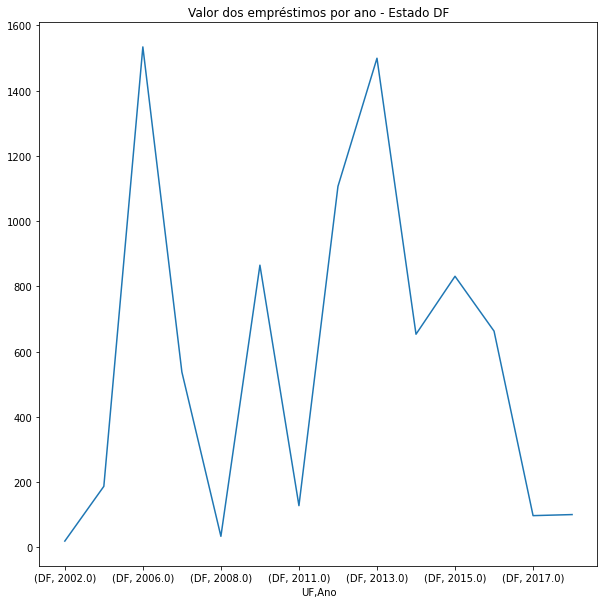

In [ ]:
#Datas


tabela_pivotsete = subdados.pivot_table(values='Valormm', index=['UF', 'Ano'], aggfunc=sum)
tabquery9= tabela_pivotsete.query('UF == "DF"')

ts = pd.Series(tabquery9.Valormm)

plt.xticks(rotation=90)
plt.title('Valor dos empréstimos por ano - Estado DF')
ts.plot(figsize = (10,10));

# **Conclusão:**




https://www.ibge.gov.br/cidades-e-estados/df.html

O Estado do Distrito Federal (DF) tem como destaques os seguintes fatos: (i) ter sido fundado em 1960 e ser o Estado onde radica-se a capital federal; (ii) ocupa a 1ª posição de 27 no que tange ao IDH, o que pode se atribuir aos altos salários do funcionalismo público, portanto, grande parte dos gastos é oriundo das necessidade do governo.

Essa contextualização auxilia a compreensão das razões que levam instituições a realizarem os empréstimos para o Estado do Distrito Federal.
Ao observar o tipo de credor, atrae atenção que as Instituições Financeiras Nacionais tem grande participação, dessas, as três mais relevantes são empresas estatais (CEF, BB, BNDES).

Realizando a abertura por finalidade (destinação dos recursos), tem-se como principal o setor de infraestrutura, seguido pela aquisição de máquinas e mobilidade do PAC2 - Grande Cidades (este último concernente a infraestrutura de transporte).


Por Brasília ser a cidade que exige os gastos que a capital do país necessita como segurança, funcionalismo público, educação e saúde, há forte necessidade de empréstimos que financiem outras despesas não correntes.




# **Geopandas**

https://geopandas.org/en/stable/getting_started.html

https://geopandas.org/en/stable/docs/user_guide/mapping.html

https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=downloads

In [ ]:
!pip install geopandas
import geopandas
from geopandas import GeoDataFrame


     |████████████████████████████████| 1.0 MB 8.8 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
     |████████████████████████████████| 6.3 MB 50.6 MB/s 


In [ ]:
dado_Mapa_uf = geopandas.read_file('/content/drive/My Drive/AP2-Patricia/BR_UF_2020.shp')
dado_Mapa_uf.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4..."
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828..."
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620..."
3,14,Roraima,RR,Norte,"POLYGON ((-63.96008 2.47313, -63.96041 2.47416..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."


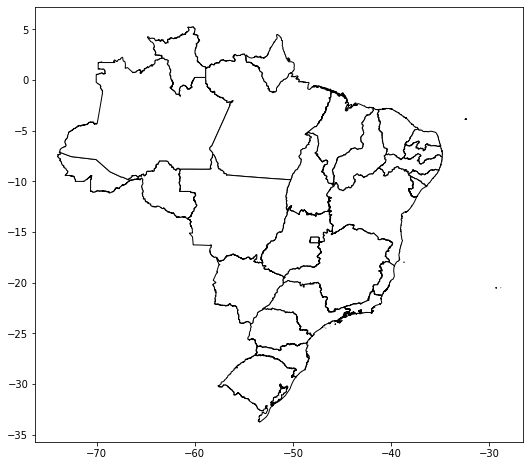

In [ ]:
dado_Mapa_uf.plot(color='white', edgecolor='black', figsize=(15,8));


In [ ]:
subdados_geo = subdados.groupby('CD_UF')['Valor'].sum()

subdados_geo.head(10)

CD_UF
11    4.587190e+09
12    5.655139e+09
13    1.029812e+10
14    2.021406e+09
15    3.886838e+10
16    3.873094e+09
17    6.367794e+09
21    7.947682e+09
22    8.468760e+09
23    2.096507e+10
Name: Valor, dtype: float64

In [ ]:
df  = dado_Mapa_uf.merge(subdados_geo, on='CD_UF', how='left')
gdf = geopandas.GeoDataFrame(df)
gdf

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry,Valor
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4...",4.587190e+09
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828...",5.655139e+09
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620...",1.029812e+10
3,14,Roraima,RR,Norte,"POLYGON ((-63.96008 2.47313, -63.96041 2.47416...",2.021406e+09
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...",3.886838e+10
5,16,Amapá,AP,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",3.873094e+09
6,17,Tocantins,TO,Norte,"POLYGON ((-48.23291 -5.94757, -48.23163 -5.946...",6.367794e+09
7,21,Maranhão,MA,Nordeste,"MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ...",7.947682e+09
8,22,Piauí,PI,Nordeste,"POLYGON ((-42.91509 -6.64795, -42.91636 -6.644...",8.468760e+09
9,23,Ceará,CE,Nordeste,"POLYGON ((-41.18292 -4.01797, -41.18552 -4.017...",2.096507e+10


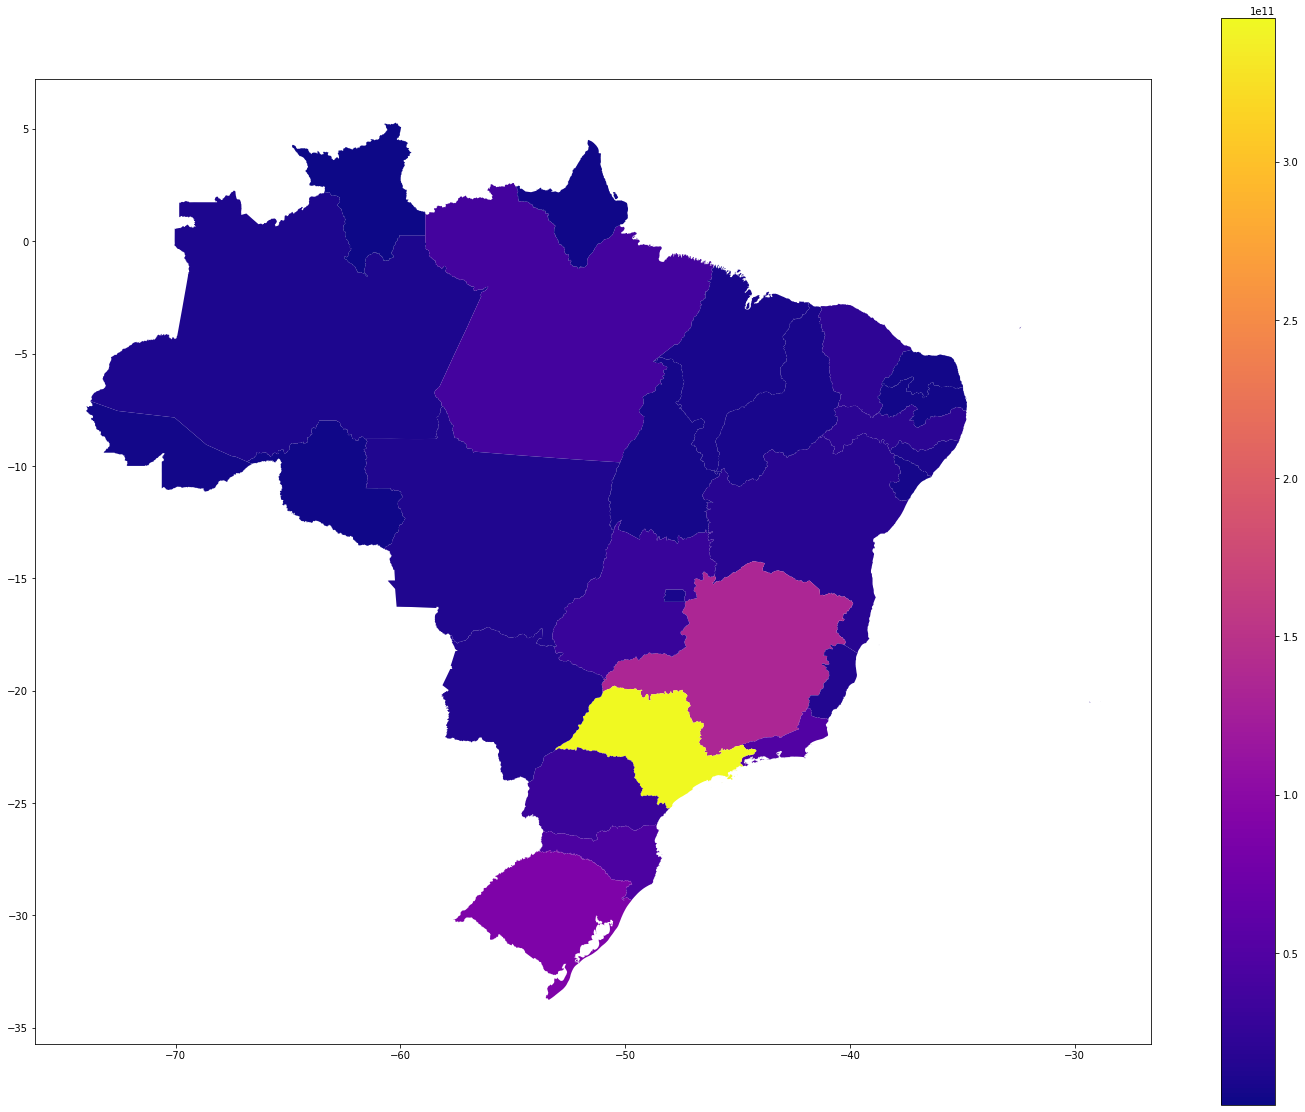

In [ ]:
gdf.plot(column='Valor', legend = True, cmap ='plasma', figsize = (25,20));

# **Conclusão Mapa:**

O que se observa, de forma cartográfica, é a distribuição do agregados dos recursos de empréstimos por UF. Nota-se nisso que os Estados com maior riqueza também são aqueles que possuem maior montante de empréstimos, uma vez que há relação entre a riqueza de um Estado e a capacidade de pagamento. 

Cada Estado possui uma nota quanto a capacidade de pagamento, divulgada publicamente pelo Tesouro (https://www.tesourotransparente.gov.br/temas/estados-e-municipios/capacidade-de-pagamento-capag), e essa mesma nota é utilizada como parâmetro nos bancos para que concedam empréstimos.

O Estado do Pará possui nota B, enquanto que o Distrito Federal possui nota B.
